In [1]:
import json
import pandas as pd

In [2]:
with open("analysis.json", 'r') as f:
    prog_dict = json.loads(f.read())

In [3]:
prog_dict

{'modules': {},
 'fdefs': {'fdef_1': {'name': 'partition',
   'retval': None,
   'lineno': 4,
   'args': ['arr', 'low', 'high'],
   'body': {},
   'ncalls': '4999',
   'tot_time': '0.020',
   'cum_time': '0.020',
   'line_profile': {'line_8': {'hits': '4999',
     'time': '6.00E-04',
     'time_per_hit': '1.20E-07',
     '%time': '3.0',
     'contents': 'pivot = arr[(high+low)//2]'},
    'line_9': {'hits': '4999',
     'time': '4.00E-04',
     'time_per_hit': '8.00E-08',
     '%time': '2.0',
     'contents': 'i = low - 1'},
    'line_10': {'hits': '4999',
     'time': '3.80E-04',
     'time_per_hit': '7.60E-08',
     '%time': '1.9',
     'contents': 'j = high + 1'},
    'line_12': {'hits': '4999',
     'time': '3.40E-04',
     'time_per_hit': '6.80E-08',
     '%time': '1.7',
     'contents': 'while True:'},
    'line_13': {'hits': '26157',
     'time': '2.02E-03',
     'time_per_hit': '7.72E-08',
     '%time': '10.1',
     'contents': 'i += 1'},
    'line_14': {'hits': '39985',
     't

In [4]:
def display_fdef_info(fdefs):
    for fdef_key in fdefs.keys():
        fdef_dict = fdefs[fdef_key]
        name = fdef_dict["name"]
        tot_time = fdef_dict["tot_time"]
        cum_time = fdef_dict["cum_time"]
        lprof_dict = fdef_dict["line_profile"]
        print("Function {0}: cum_time = {1}".format(name, cum_time))
        for l_key in lprof_dict.keys():
            l_dict = lprof_dict[l_key]
            hits = l_dict["hits"]
            time = l_dict["time"]
            percent_time = l_dict["%time"]
            contents = l_dict["contents"]
            print("{0}: contents = {1} | hits = {2} | time = {3} | %time = {4}".format(
                l_key, contents, hits, time, percent_time))
        print()

In [5]:
display_fdef_info(prog_dict.get("fdefs"))

Function partition: cum_time = 0.020
line_8: contents = pivot = arr[(high+low)//2] | hits = 4999 | time = 6.00E-04 | %time = 3.0
line_9: contents = i = low - 1 | hits = 4999 | time = 4.00E-04 | %time = 2.0
line_10: contents = j = high + 1 | hits = 4999 | time = 3.80E-04 | %time = 1.9
line_12: contents = while True: | hits = 4999 | time = 3.40E-04 | %time = 1.7
line_13: contents = i += 1 | hits = 26157 | time = 2.02E-03 | %time = 10.1
line_14: contents = while arr[i] < pivot: | hits = 39985 | time = 3.64E-03 | %time = 18.2
line_15: contents = i += 1 | hits = 13828 | time = 1.10E-03 | %time = 5.5
line_16: contents = j -= 1 | hits = 26157 | time = 2.08E-03 | %time = 10.4
line_17: contents = while arr[j] > pivot: | hits = 39388 | time = 3.60E-03 | %time = 18.0
line_18: contents = j -= 1 | hits = 13231 | time = 1.08E-03 | %time = 5.4
line_19: contents = if i >= j: | hits = 26157 | time = 2.02E-03 | %time = 10.1
line_20: contents = return j | hits = 4999 | time = 3.40E-04 | %time = 1.7
line_

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

In [7]:
def scatter_fdef_info(fdefs):
    count = 0
    counts = []
    hits_list = []
    time_list = []
    fnames = []
    for fdef_key in fdefs.keys():
        fdef_dict = fdefs[fdef_key]
        name = fdef_dict["name"]
        tot_time = fdef_dict["tot_time"]
        cum_time = fdef_dict["cum_time"]
        lprof_dict = fdef_dict["line_profile"]

        for l_key in lprof_dict.keys():
            l_dict = lprof_dict[l_key]
            hits = l_dict["hits"]
            time = l_dict["time"]
            percent_time = l_dict["%time"]
            contents = l_dict["contents"]
            time_list.append(float(time) * 100000)
            count += 1
            counts.append(count)
            hits_list.append(int(hits))
            fnames.append(name)
        print()
        
    plt.ylim([-10000, max(hits_list)+10000])
    c = ["r" if fname == "quickSort" else "b" if fname == "partition" else 'k' for fname in fnames]

    plt.axis('off')
    plt.scatter(counts, hits_list, s=time_list, c=c)
    plt.plot(counts, hits_list)

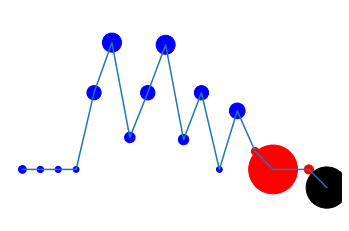

In [8]:
scatter_fdef_info(prog_dict.get("fdefs"))

In [33]:
import seaborn as sns
def get_fdef_dfs(df, number):
    fdf = pd.DataFrame(df["fdefs"]["fdef_{0}".format(number)]["line_profile"]).T
    for col in fdf.columns:
        if col != 'contents':
            fdf[col] = fdf[col].astype('float64')
    return fdf
    

In [44]:
import json
df = pd.read_json('analysis.json')
fdfs = []

for i in range(len(df["fdefs"].keys())):
    try:
        fdfs.append(get_fdef_dfs(df, i+1))
    except:
        break
        
sns.set(rc={'figure.figsize':(12,8)})

fdef_df = pd.concat([fdf for fdf in fdfs], axis=0)

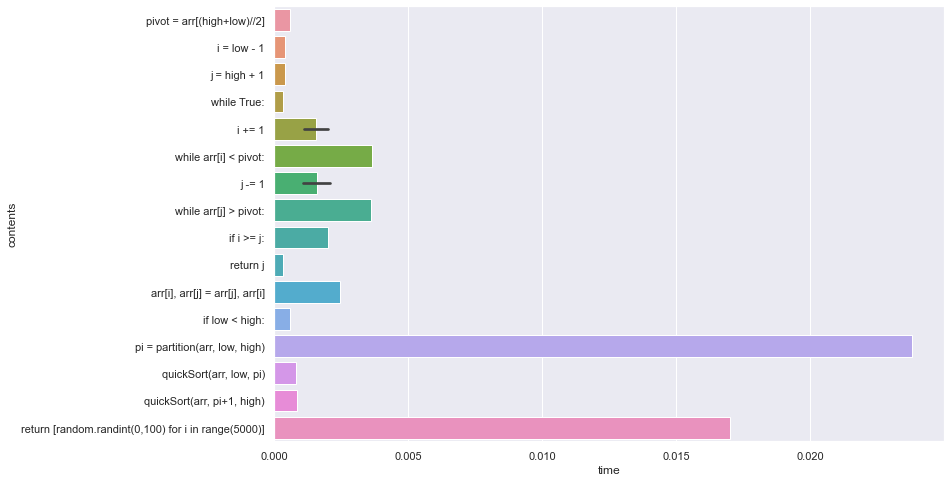

In [65]:
sns_plot = sns.barplot(data=fdef_df.reset_index(), x='time', y='contents')
fig = sns_plot.get_figure()
fig.savefig("function_barplot.png")

<AxesSubplot:xlabel='time', ylabel='contents'>

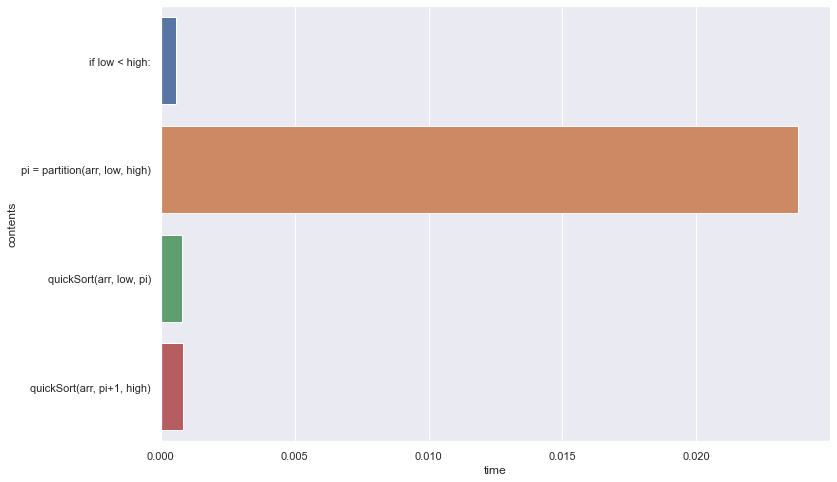

In [38]:
sns.barplot(data=fdfs[1].reset_index(), x='time', y='contents')  

<AxesSubplot:xlabel='time', ylabel='contents'>

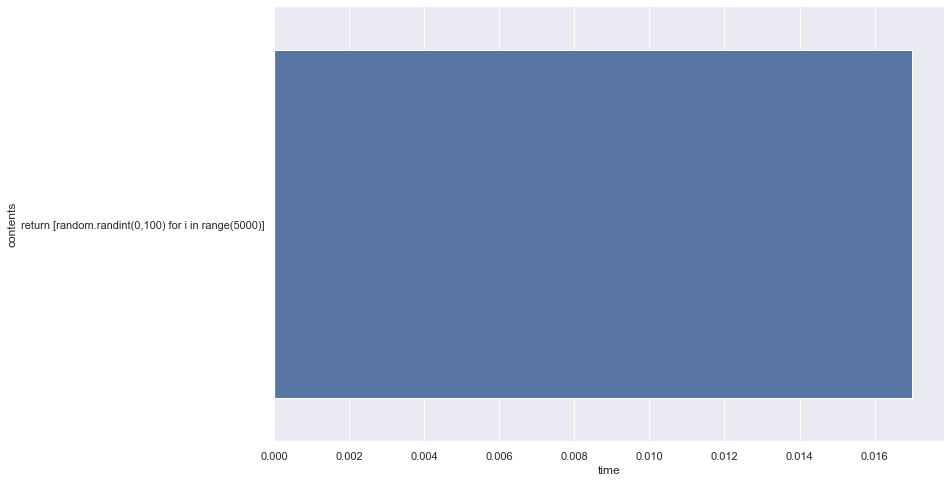

In [39]:
sns.barplot(data=fdfs[2].reset_index(), x='time', y='contents')  